In [19]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, END
import random

In [20]:
class LoopGraph(TypedDict):
    player_name: str
    targetnum: int
    guesses: list[int]
    attempt: int
    lower_bound: int
    upper_bound: int
    hint: str

In [21]:
def setUp_loop(state: LoopGraph) -> LoopGraph:
    """Initializes the loop graph with the given state."""
    state['player_name'] = f"Hello, {state['player_name']}!, welcome to the guessing game."
    state['targetnum'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'] = []
    state['attempt'] = 0
    return state

def guess_loop(state: LoopGraph) -> LoopGraph:
    """Processes a guess and updates the state accordingly."""
    state['guesses'].append(random.randint(state['lower_bound'], state['upper_bound']))
    state['attempt'] += 1
    return state


def hint_loop(state: LoopGraph) -> LoopGraph:
    last_guess = state['guesses'][-1]
    target = state['targetnum']

    if last_guess < target:
        hint = "higher"
        print("Your guess is too low.")
    elif last_guess > target:
        hint = "lower"
        print("Your guess is too high.")
    else:
        hint = "correct"
        print("Congratulations! You've guessed the number!")

    return {"hint": hint}

def decider_loop(state: LoopGraph) -> LoopGraph:
    """Decides whether the game should continue or end based on the current state."""
    if state["hint"] == "correct":
        return "end"
    elif state["attempt"] >= 7:
        return "end"
    else:
        return "continue"

In [22]:
graph = StateGraph(LoopGraph)

graph.add_node('setUp', setUp_loop)
graph.add_node('guess', guess_loop)
graph.add_node('hint', hint_loop)
graph.add_edge('setUp', 'guess')
graph.add_edge('guess', 'hint')

graph.set_entry_point('setUp')
graph.add_conditional_edges("hint", decider_loop, { "continue" : 'guess', "end" : END })




app = graph.compile()

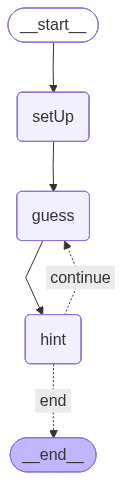

In [23]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
answer = app.invoke({
    'player_name': 'student',
    'guesses': [],
    'attempt': 0,
    'lower_bound': 1,
    'upper_bound': 20
})
print(answer)


Your guess is too low.
Your guess is too low.
Your guess is too low.
Your guess is too low.
Your guess is too high.
Your guess is too low.
Your guess is too low.
{'player_name': 'Hello, student!, welcome to the guessing game.', 'targetnum': 19, 'guesses': [14, 2, 3, 18, 20, 9, 14], 'attempt': 7, 'lower_bound': 1, 'upper_bound': 20, 'hint': 'higher'}
